# School of Hard Knocks

This notebook is a dive into Machine Learning and Data Science by using a fake school of test data. By carefully and deliberately generating a fake school's test results, we can insert patterns, irregularities and trends and test our analysis to make sure we pick it up.


In [40]:
# Required libraries and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [67]:
from random import shuffle

class Generator:
    """
    Handles the generation of students results for analysis.
    """
    
    def __init__(self, limit):

        self.students = self._get_students()
            
        self.limit = limit

    def _get_students(self):
        """Create the initail student list"""
        with open("names_male.txt", 'r') as f:
            males = [name.split(' ')[0] for name in f.readlines()] 
        with open("names_female.txt", 'r') as f:
            females = [name.split(' ')[0] for name in f.readlines()]
        
        scores = [50 + 50 * (random.normalvariate(0.5, 0.35) - 0.5) for x in range(0, 100)]

        students = [{'Name': name,
                    'Gender': 'Male',
                    'Score': scores[k]} for k, name in enumerate(males)]

        students += [{'Name': female,
                     'Gender': 'Female',
                     'Score': scores[k]} for k, female in enumerate(females)]
        
        shuffle(students)
        return students
        
    def get_names(self):
        return pd.Series([stu['Name'] for stu in self.students[0: self.limit]])
    
    def get_scores(self):
        return pd.Series([stu['Score'] for stu in self.students[0: self.limit]])

    def get_genders(self):
        return pd.Series([stu['Gender'] for stu in self.students[0: self.limit]])
    
gen = Generator(100)
results = pd.DataFrame({"Name": gen.get_names(),
                        "Score": gen.get_scores(),
                        "Gender": gen.get_genders()})
results[:10]


,Gender,Name,Score
0,Female,Fabiola,76.027092
1,Female,Shaunna,36.909752
2,Male,Marlin,43.222936
3,Female,Kenyetta,78.596050
4,Female,Leanne,71.662867
5,Female,Adele,31.861865
6,Female,Daniela,45.167374
7,Male,Waldo,54.835985
8,Male,Erin,63.718159
9,Female,Stefani,64.010172


(array([  6.,   4.,  12.,  14.,  24.,  20.,  10.,   8.,   0.,   2.]),
 array([  10.9936622 ,   19.98699994,   28.98033767,   37.97367541,
          46.96701314,   55.96035088,   64.95368861,   73.94702635,
          82.94036408,   91.93370182,  100.92703955]),
 <a list of 10 Patch objects>)

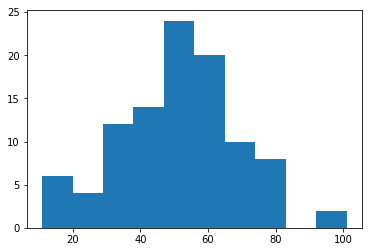

In [68]:
fig, ax = plt.subplots()
ax.hist(results['Score'])


In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']

In [47]:
cities['City name'].apply(lambda c: c.startswith('San')) & cities['Area square miles'].apply(lambda c: c > 50)

0    False
1     True
2    False
dtype: bool

In [57]:
cities.reindex(np.random.permutation(cities.index))
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
2,San Jose,1015785,176.53,5754.177760
1,Sacramento,485199,97.92,4955.055147
